<a href="https://colab.research.google.com/github/ywang1110/Machine-Learning/blob/main/iRobot_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.irobot.com/-/media/images/features/product-hero-images/background-images/braava/m6_silver_staticbanner_lifestyle_kitchen_overlay_holiday_1733x800.ashx?h=646&amp;iar=0&amp;mw=1400&amp;w=1400&amp;hash=CCD59B656C9FCB0E481A45067BCB17E6" width="560" height="280" /> 
<img src="https://store.irobot.com/on/demandware.static/-/Library-Sites-iRobotSharedLibrary/default/dw7a664337/m6_BF_8.jpg" width="280"
height="280" />


# Background
iRobot has a series of wifi-connected robotic vacuum cleaners available for sale worldwide. These robots are capable of autonomously navigating a home to vacuum its floors. Upon mission completion, they send a summary report of the mission to cloud services, where it is processed and stored as a row in a database. However, any cleaning mission performed while the robot is not connected to wifi (either by user's choice or a faulty connection) will not be saved in the database. In addition, there are occasional periods where cloud services malfunction and no missions are reported, resulting in discrete periods of data loss.

These robots are programmed with an automatic recharge and resume function, which means that when the robot detects its battery levels reaching critically low levels, it will navigate back to the charging dock if available and charge for up to 90 minutes before resuming the mission. In addition, if a robot becomes stuck on an obstacle in its environment or is manually paused by a button press, it will cease cleaning for up to 90 minutes before terminating the mission. If the user restarts the mission with a button press within 90 minutes of the pause, the robot will continue cleaning normally. The number of minutes spent cleaning, charging, or paused are reported for each mission, as is the mission outcome (a field describing whether the mission was cancelled, the robot got stuck, the battery died, or the robot completed the job successfully).

# Data
1. mission_data.csv.bz2
This table contains details of cleaning missions for a sample of 10,000 wifi-connected robots
The columns are defined as follows:
 * **robotid**: a unique robot identifier
 * **datetime**: a date string that represents the start time of a mission in GMT
 * **nmssn**: mission number. This information comes from an internal counter on the robot that increments +1 per mission. Be aware that the complete mission history from mission 1 may not be included for each robot (due to missions being run before the robot was connected to wifi or data loss). The max mission number per robot should reflect its total number of missions to date reported to the database.
 * **runm**: this is the time in minutes that the robot spent actually cleaning.
 * **chrgm**: this is the time in minutes that a robot spent charging.
 * **pausem**: this is the time in minutes that a robot spent paused.
 * **outcome**: this is the end status of a mission. "Cncl" indicates that the mission was cancelled by the user. "Stuck" means the robot got stuck on an obstacle, and was not rescued within 90 minutes, so could not return to the dock. "Bat" means the robot's battery grew too low for it to return to the dock. "Ok" means the robot successfully completed cleaning the space and returned to the dock.

2. geo_data.csv.bz2
This table contains details of the robot's geographic location.
The columns are defined as follows:
 * **robotid**: unique robot identifier
 * **country_cd**: 2-letter ISO country code
 * **timezone**: robot's timezone (from IANA/Olson database)

# Tasks
Perform data analysis exploring use patterns of the typical robot user per country. Include relevant visualizations where appropriate, and address any possible effects of data loss on your findings.
1. Are there geographic differences in robot usage?
  - Consider all descriptive features of a mission, including when and how frequently it occurred.
  - If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.
2. We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.

# Tools and Submission
Python is preferred, but you may use R or another tool that best demonstrates your skills. You are welcome to use any Python libraries you want. Your final submission should be a single document, either a Jupyter notebook with inline figures or a PDF that includes both write-ups and figures. Be sure to describe your hypotheses, methods, reasoning, and findings (including null findings) in addition to the code required to answer each question. You should expect this task to take 4-5 hours.


# Prepare dataset

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
geo = pd.read_csv('/content/gdrive/My Drive/Interview/iRobot/geo_data.csv')
mission = pd.read_csv('/content/gdrive/My Drive/Interview/iRobot/mission_data.csv')

In [ ]:
data = geo.merge(mission, how='inner', on = 'robotid')
data.head(5)

,country_cd,timezone,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 19:15:38,16,26,0,5,ok
1,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 03:09:12,17,63,0,14,ok
2,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-11 17:05:58,18,49,0,11,bat
3,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 02:09:54,19,39,0,8,ok
4,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 16:38:55,21,38,0,8,ok


In [ ]:
data_overall_outcome = data['outcome'].value_counts()
data_overall_outcome 

ok       190137
cncl     146615
stuck     22241
bat        8686
Name: outcome, dtype: int64

In [ ]:
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

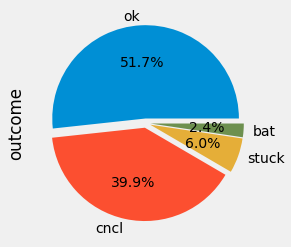

In [ ]:
data['outcome'].value_counts(normalize=True).plot.pie(autopct="%.1f%%",explode=[0.05]*4)

# Task 1
1. Are there geographic differences in robot usage?
  - Consider all descriptive features of a mission, including when and how frequently it occurred.
  - If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.

## number/percentage of robots used in each country

In [ ]:
data.head()

,country_cd,timezone,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 19:15:38,16,26,0,5,ok
1,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 03:09:12,17,63,0,14,ok
2,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-11 17:05:58,18,49,0,11,bat
3,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 02:09:54,19,39,0,8,ok
4,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 16:38:55,21,38,0,8,ok


In [ ]:
data_country = data.groupby(by='country_cd')['robotid'].count().sort_values(ascending=False)
data_country = pd.DataFrame(data_country).reset_index()
data_country.columns= ['country_cd','number']
data_country['percentage'] = data_country['number']/data_country['number'].sum()*100.0
data_country.head()

,country_cd,number,percentage
0,IL,220119,59.878892
1,CN,21054,5.727312
2,FR,17719,4.820093
3,JP,11743,3.194444
4,CA,11126,3.026602


Text(0.5, 1.0, 'percentage of robots in each country')

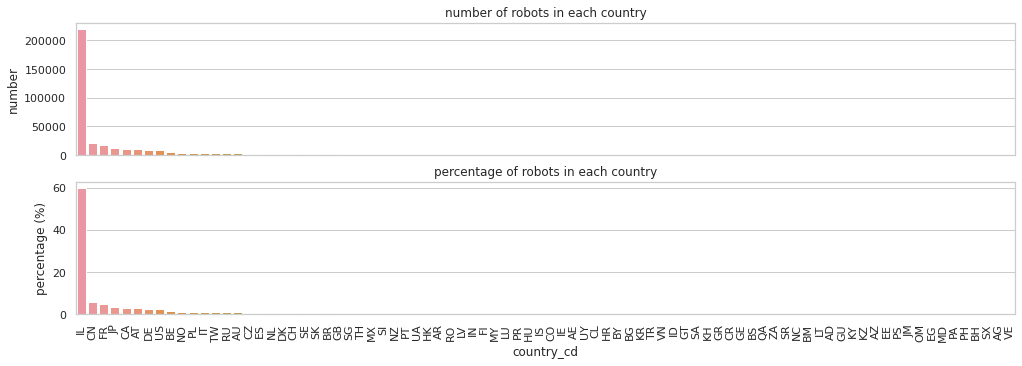

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
sns.set_theme(style="whitegrid")

ax1 = plt.subplot(211)
ax1 = sns.barplot(x='country_cd', y='number', data=data_country)
ax1.get_xaxis().set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('number of robots in each country')

ax2 = plt.subplot(212, sharex=ax1)
ax2 = sns.barplot(x='country_cd', y='percentage', data=data_country)
plt.xticks(rotation=90)
plt.ylabel('percentage (%)')
plt.title('percentage of robots in each country')

## Create a world map

### Remove the missing value in country code

In [ ]:
data_country.isnull().sum()

country_cd    0
number        0
percentage    0
dtype: int64

In [ ]:
data_country.head()

,country_cd,number,percentage
0,IL,220119,59.878892
1,CN,21054,5.727312
2,FR,17719,4.820093
3,JP,11743,3.194444
4,CA,11126,3.026602


In [ ]:
# Get longitude and latitude
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
import numpy as np


geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude, loc.longitude
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
la, lo=geolocate('Israel')
la

31.5313113

### 2-letter code -> Country name

In [ ]:
!pip install pycountry

In [ ]:
unique_country_cd = data_country['country_cd'].tolist()
len(unique_country_cd)

84

In [ ]:
import pycountry
country_mapping = {}
for i in unique_country_cd:
  country_mapping[i] = pycountry.countries.get(alpha_2=i).name
country_mapping = pd.DataFrame(country_mapping.items())
country_mapping.columns = ['country_cd', 'country']
country_mapping = country_mapping.set_index('country_cd')
country_mapping.head()

,country
country_cd,
IL,Israel
CN,China
FR,France
JP,Japan
CA,Canada


In [ ]:
country_mapping['Latitude'] = country_mapping['country'].apply(lambda x: geolocate(x)[0])
country_mapping['Longitude'] = country_mapping['country'].apply(lambda x: geolocate(x)[1])

In [ ]:
country_mapping.head()

,country,Latitude,Longitude
country_cd,,,
IL,Israel,31.531311,34.866765
CN,China,35.000074,104.999927
FR,France,46.603354,1.888334
JP,Japan,36.574844,139.239418
CA,Canada,61.066692,-107.991707


In [ ]:
for i in ['country', 'Latitude', 'Longitude']:
  data_country[i] = data_country['country_cd'].map(country_mapping[i])
data_country.head() 

,country_cd,number,percentage,country,Latitude,Longitude
0,IL,220119,59.878892,Israel,31.531311,34.866765
1,CN,21054,5.727312,China,35.000074,104.999927
2,FR,17719,4.820093,France,46.603354,1.888334
3,JP,11743,3.194444,Japan,36.574844,139.239418
4,CA,11126,3.026602,Canada,61.066692,-107.991707


In [ ]:
# Create a world map
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
data_country.head(5)
data_country.iloc[1]['country']
# data_country.iloc[0]['number']

a = 10
a = 20

'China'

In [ ]:
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(data_country)):
# for i in range(2):
        lat = data_country.iloc[i]['Latitude']
        long = data_country.iloc[i]['Longitude']
        radius = max(data_country.loc[i]['number']/20000, 6)
        popup_text = """Market : {}<br>
                    Number: {}<br>"""
        popup_text = popup_text.format(data_country.loc[i]['country'], data_country.loc[i]['number'])
        folium.CircleMarker(location = (lat, long), radius=radius, popup = popup_text, tooltip = popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [ ]:
world_map.save("index.html")

# Task 2
We are aware that data loss exists among the mission records, but are unsure of the cause. 
- Quantify the extent of the loss, differentiating between discrete catastrophic events
- Quantify the random mission loss for individual robots. 

Investigate whether this loss is uniform or whether it may be impacting other analyses.

## Find the data loss

### sort_values

In [ ]:
data= data.sort_values(by=['country_cd', 'robotid', 'nmssn'])   # make sure that "nmssn" is ordered
data.head()

,country_cd,timezone,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
157899,AD,Europe/Andorra,NABAHPPWEMFF0M8L,2017-10-27 07:51:49,23,36,0,8,cncl
157900,AD,Europe/Andorra,NABAHPPWEMFF0M8L,2017-10-27 10:48:20,24,63,0,14,cncl
157901,AD,Europe/Andorra,NABAHPPWEMFF0M8L,2017-10-27 17:48:20,25,1,0,0,ok
157902,AD,Europe/Andorra,NABAHPPWEMFF0M8L,2017-10-27 17:01:49,26,32,0,7,ok
157903,AD,Europe/Andorra,NABAHPPWEMFF0M8L,2017-10-27 18:31:04,27,0,0,0,cncl


In [ ]:
def find_loss(x, id):
  data = x[x['robotid']==id]
  data['diff'] = data['nmssn'].diff(-1)
  return data[data['diff']!=-1].dropna()

In [ ]:
import numpy as np

unique_ids = np.unique(data['robotid'])
len(unique_ids)

9826

In [ ]:
df_loss = pd.DataFrame()
for id in unique_ids: 
  df_loss = df_loss.append(find_loss(data, id))

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
df_loss.head(5)

,country_cd,timezone,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,diff
326794,IL,Asia/Jerusalem,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,-3.0
230859,IL,Asia/Jerusalem,006Q50H53GXM7BYO,2016-09-30 23:07:28,22,40,0,0,ok,-2.0
230864,IL,Asia/Jerusalem,006Q50H53GXM7BYO,2016-11-23 01:04:06,28,50,15,20,cncl,-2.0
230868,IL,Asia/Jerusalem,006Q50H53GXM7BYO,2017-01-27 04:51:49,33,3,1,0,stuck,-2.0
230869,IL,Asia/Jerusalem,006Q50H53GXM7BYO,2017-03-29 14:20:58,35,75,22,16,ok,-2.0


In [ ]:
data_loss_outcome = df_loss['outcome'].value_counts()
data_loss_outcome

ok       27373
cncl     21043
stuck     3138
bat       1268
Name: outcome, dtype: int64

In [ ]:
 data_loss = pd.concat([data_overall_outcome, data_loss_outcome], axis=1)
data_loss.columns = ['overall', 'loss']
data_loss

,overall,loss
ok,190137,27373
cncl,146615,21043
stuck,22241,3138
bat,8686,1268


In [ ]:
data_loss_percentage = data_loss.apply(lambda x: x/x.sum()*100)
data_loss_percentage

,overall,loss
ok,51.712771,51.821211
cncl,39.875816,39.837568
stuck,6.049026,5.940707
bat,2.362387,2.400515


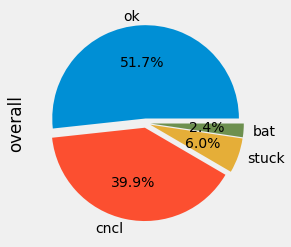

In [ ]:
data_loss_percentage['overall'].plot.pie(autopct="%.1f%%",explode=[0.05]*4)

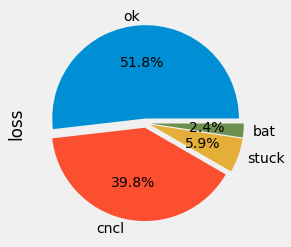

In [ ]:
data_loss_percentage['loss'].plot.pie(autopct="%.1f%%",explode=[0.05]*4)

### Statistical test (Chi-Squared Test)